In [65]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
from datetime import date, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [66]:
today = date.today()
past_time = today - timedelta(days = 200)
eth_data = yf.download("ETH-USD", past_time,today, interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [67]:
plt.style.use("seaborn-v0_8-paper")
decrease_color = "red"
increase_color = "#50C878"
eth_stock_up = eth_data[eth_data.Close >= eth_data.Open]
eth_stock_down = eth_data[eth_data.Close <= eth_data.Open]

In [68]:
simple_average12 = eth_data["Close"].rolling(12).mean()
eth_data["Simple Average (12)"] = simple_average12
exp_12 = eth_data["Simple Average (12)"].ewm(span = 12, adjust = False).mean()

simple_average26 = eth_data["Close"].rolling(26).mean()
eth_data["Simple Average (26)"] = simple_average26
exp_26 = eth_data["Simple Average (26)"].ewm(span = 26, adjust = False).mean()

Get ready for some cold card cash! It looks like you are going have to sell your stock pretty soon!


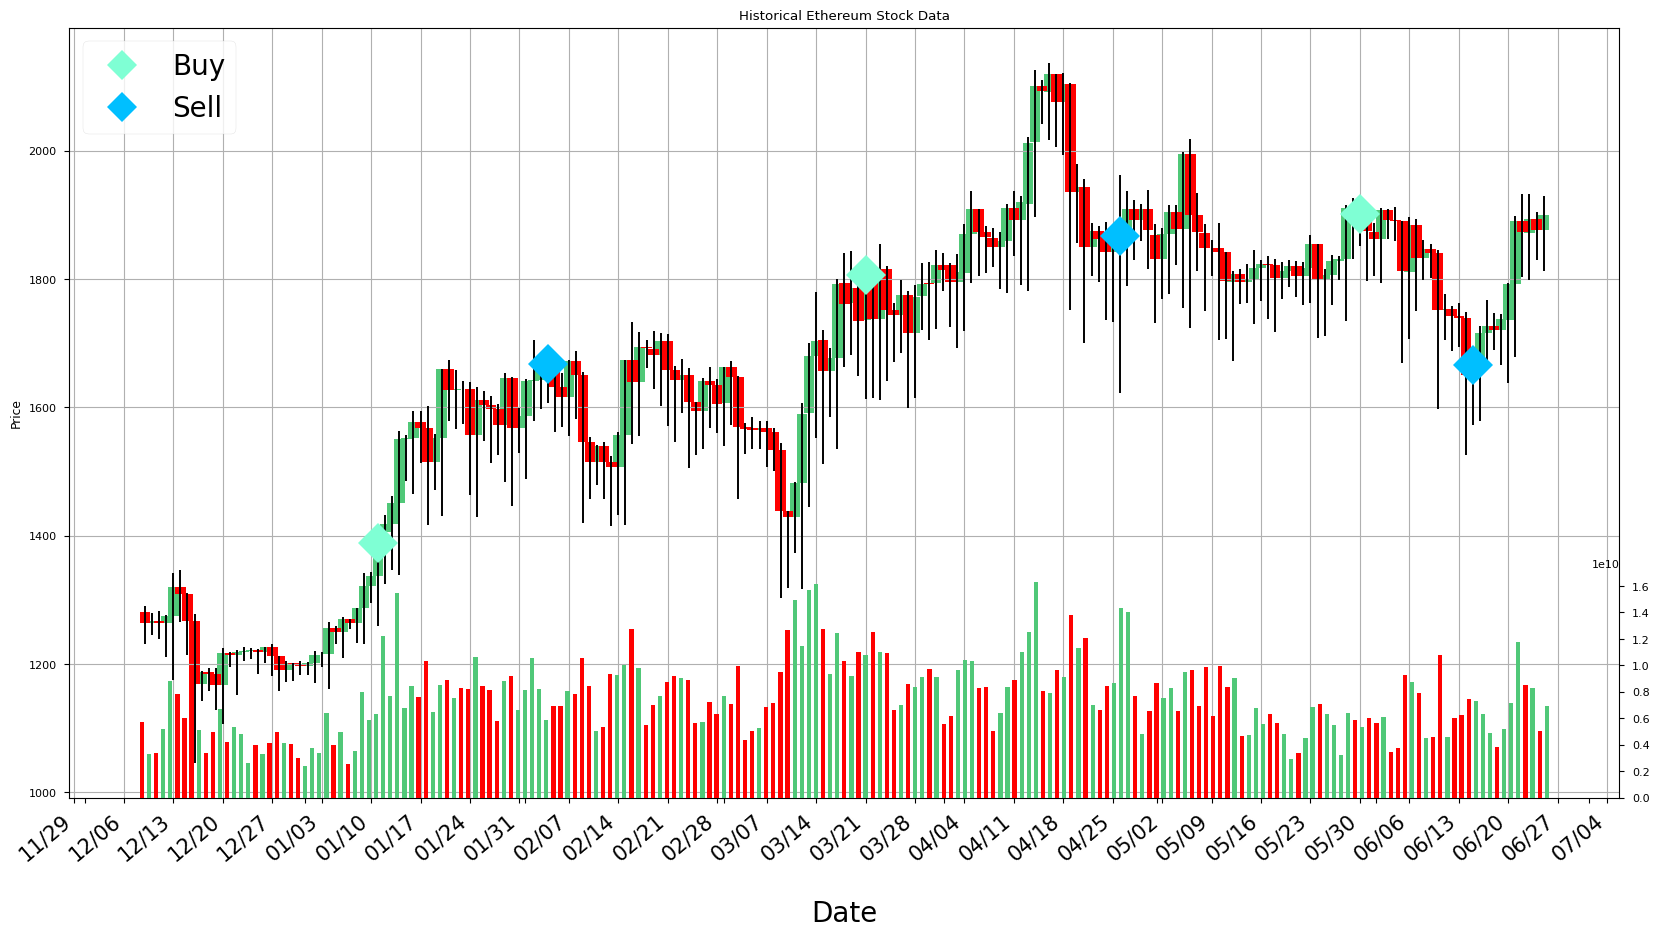

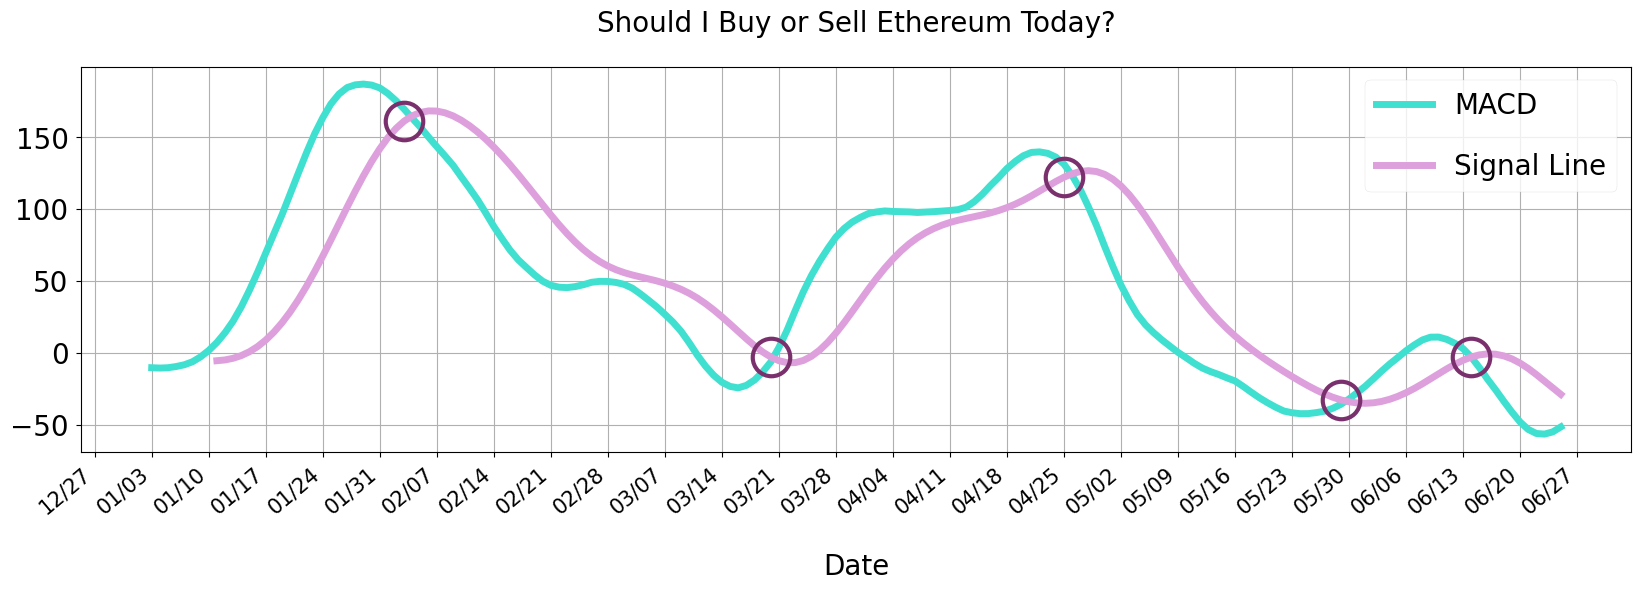

In [69]:
setup_CandleStick()

In [70]:
def setup_CandleStick():
    eth_fig = plt.figure(figsize = (20, 10))
    ax = plt.subplot()
    plt.bar(eth_stock_up.index, eth_stock_up.Close - eth_stock_up.Open, 1.5, eth_stock_up.Open, color = increase_color)
    plt.errorbar(eth_stock_up.index, eth_stock_up.Low, yerr = eth_stock_up.High - eth_stock_up.Low, fmt = "none", color = "black", capsize = 2)
    plt.bar(eth_stock_down.index, eth_stock_down.Open - eth_stock_down.Close, 1.5, eth_stock_down.Close, color = decrease_color)
    plt.errorbar(eth_stock_down.index, eth_stock_down.Low, yerr = eth_stock_down.High - eth_stock_down.Low, fmt = "none", color = "black", capsize = 2)

    setup_xticks(ax)
    plt.title("Historical Ethereum Stock Data")
    plt.xlabel("Date")
    plt.ylabel("Price")
    ax.grid(True)
    setup_MACD_Signals()
    plot_signals()
    plot_MACD_Signal()
    
    ax2 = eth_fig.add_subplot(3, 2, (5, 6))
    stockVolume_barGraph(ax2)
    
    plt.show()

Get ready for some cold card cash! It looks like you are going have to sell your stock pretty soon!


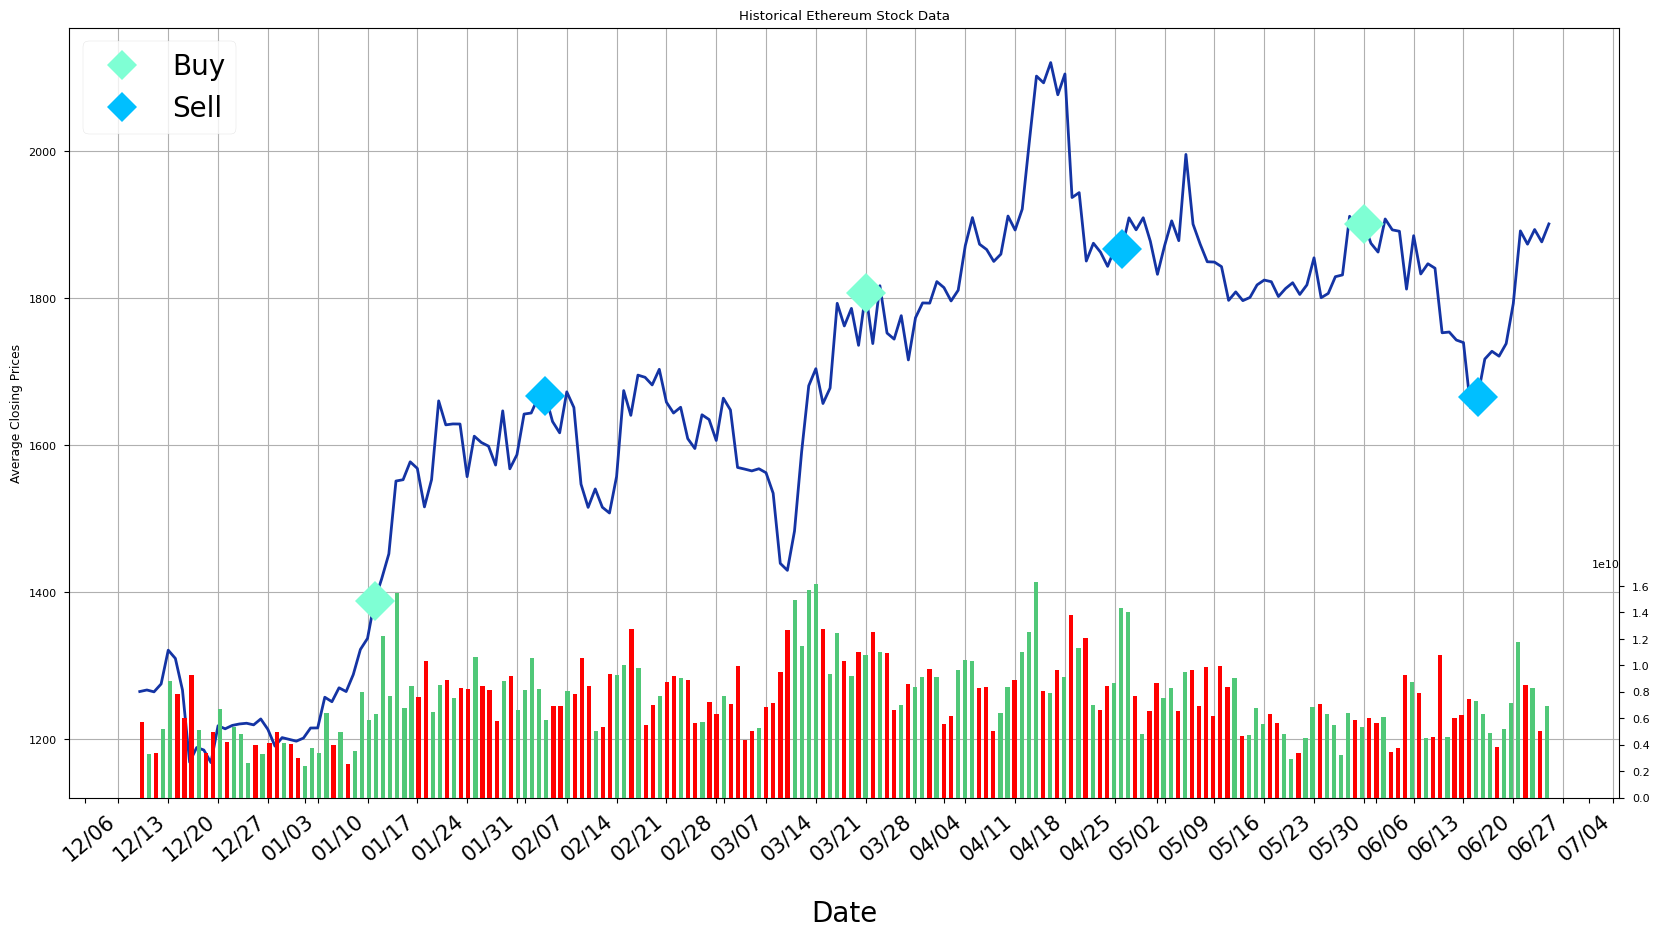

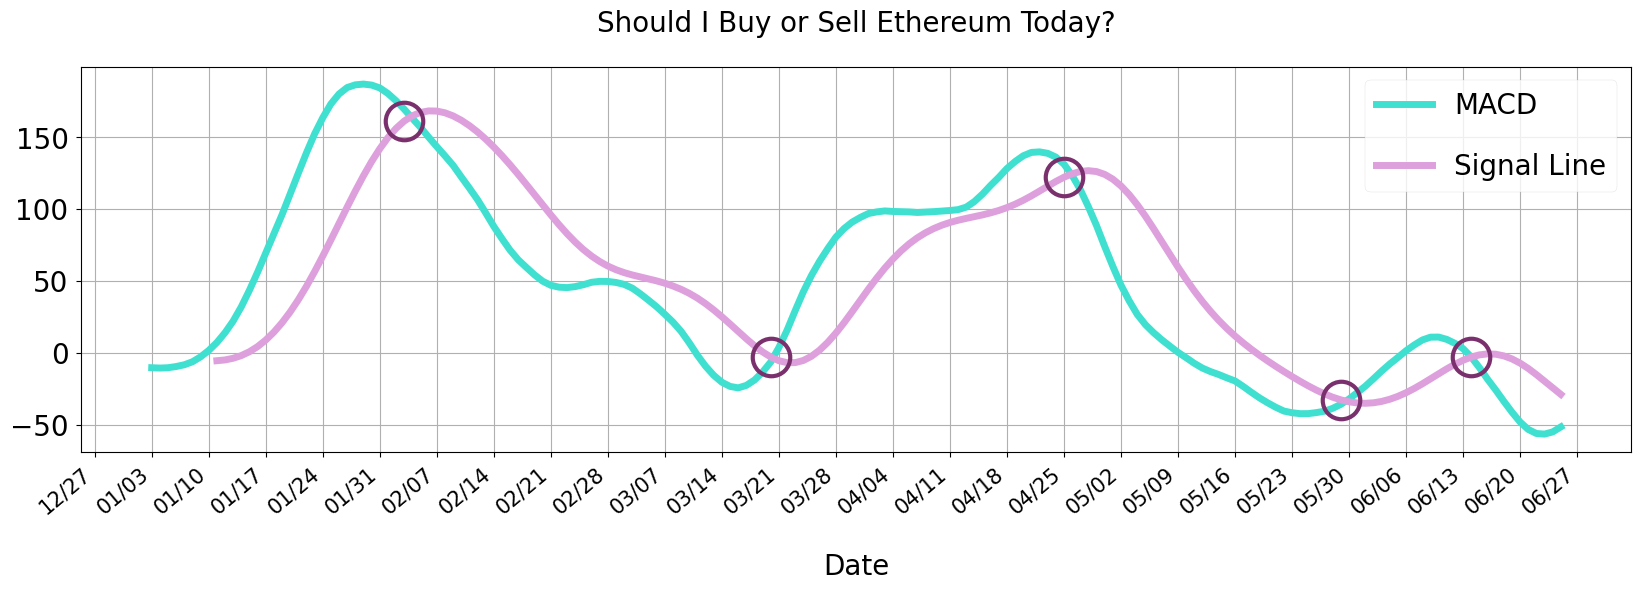

In [71]:
setup_StockPriceLinePlot()

In [72]:
def setup_StockPriceLinePlot():
    eth_fig = plt.figure(figsize = (20, 10))
    ax = plt.subplot()
    eth_plot = sns.lineplot(data = eth_data, x = "Date", y = "Close", color = "#1434A4", linewidth = 2)
    eth_plot.set_title("Historical Ethereum Stock Data")
    eth_plot.set_ylabel("Average Closing Prices")

    setup_xticks(ax)
   
    ax.grid(True)
    setup_MACD_Signals()
    plot_signals()
    plot_MACD_Signal()

    ax2 = eth_fig.add_subplot(3, 2, (5, 6))
    stockVolume_barGraph(ax2)

    plt.show()
    

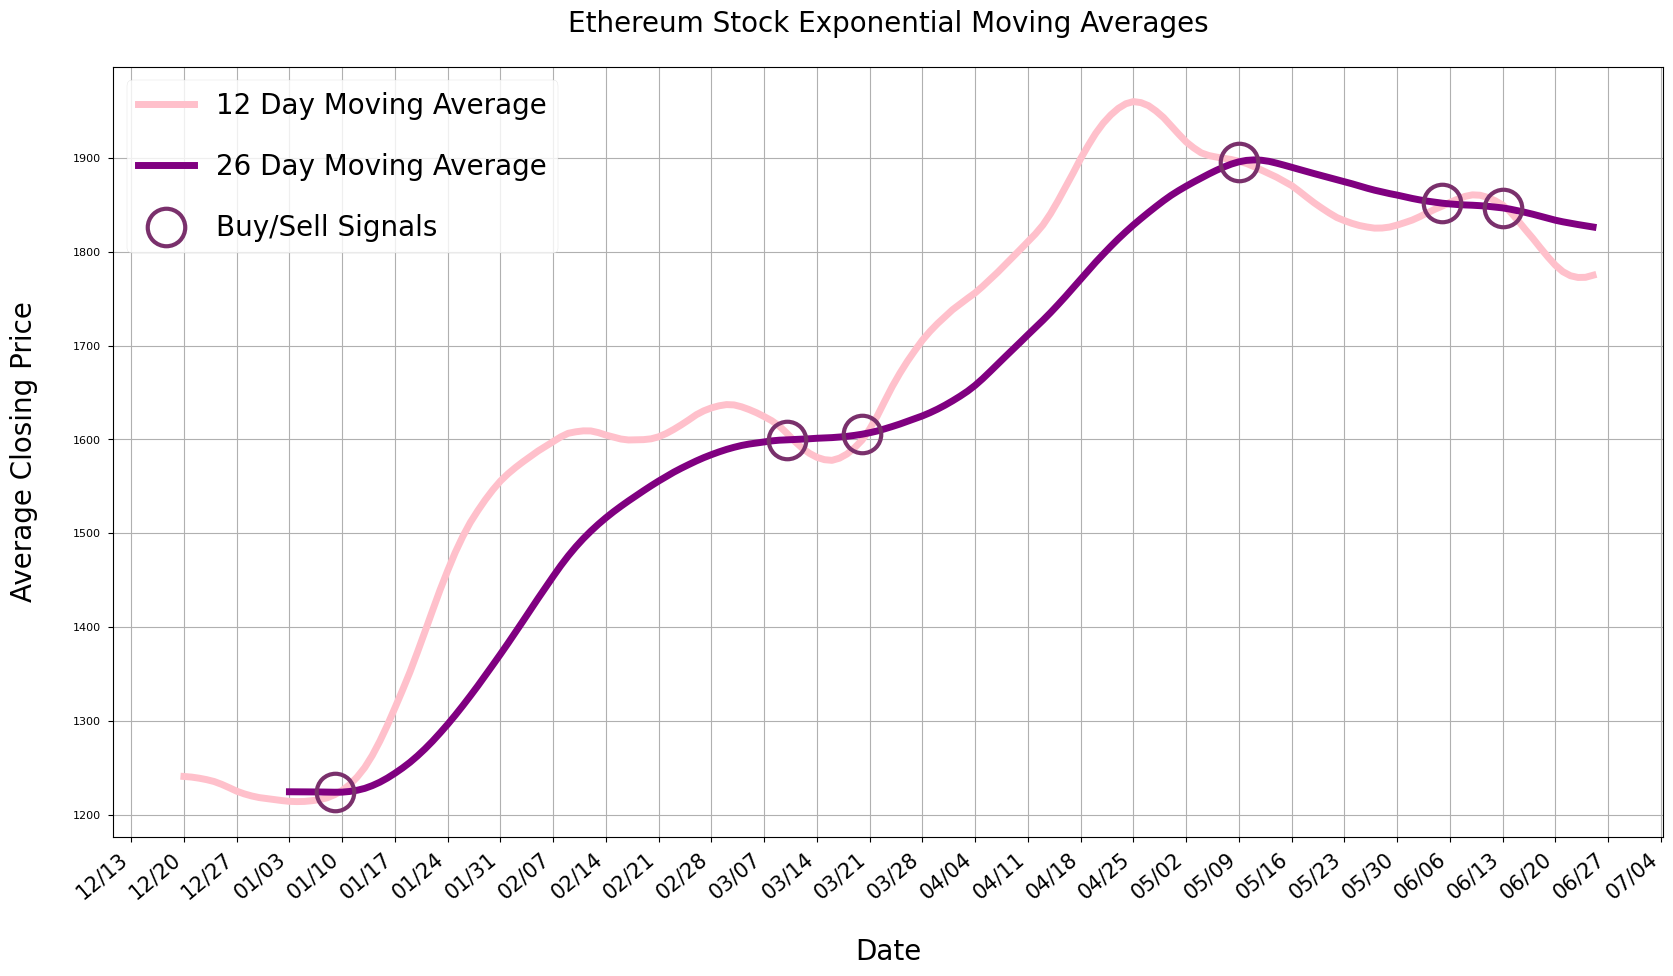

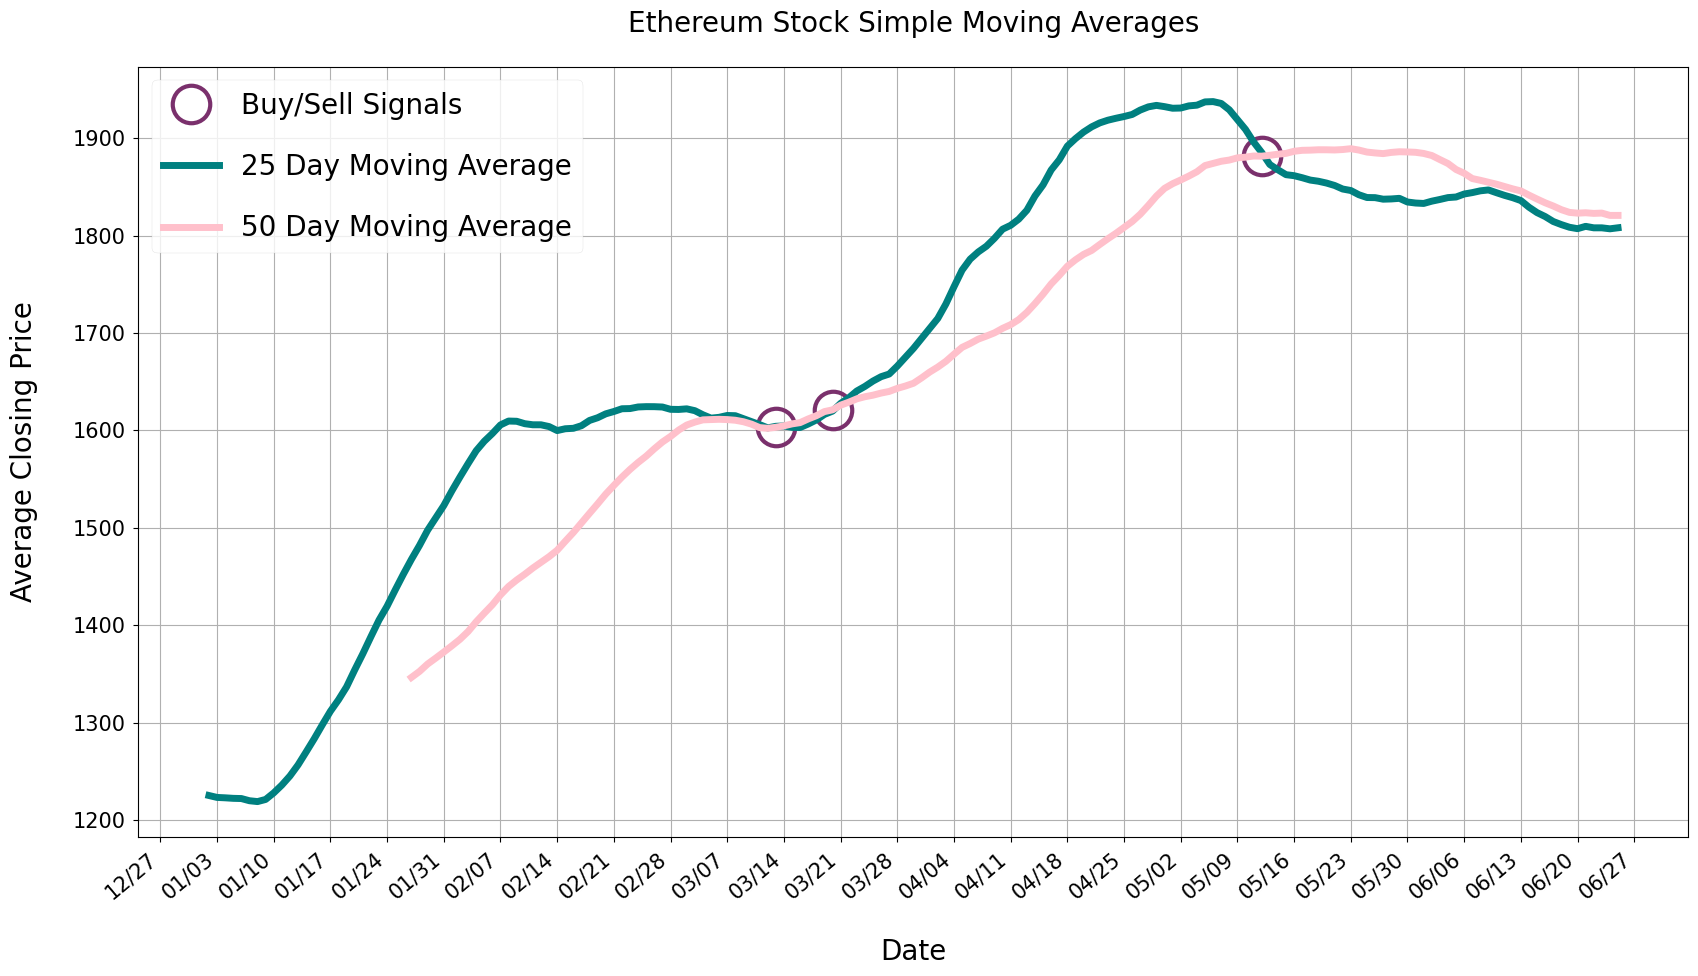

In [73]:
EMA_Graph()
SMA_Graph()


In [74]:
def SMA_Graph():

    eth_fig = plt.figure(figsize = (20, 10))
    ax = plt.subplot()
    setup_xticks(ax)

    simple_average50 = eth_data["Close"].rolling(50).mean()
    simple_average25 = eth_data["Close"].rolling(25).mean()

    dates = eth_data.index
    SMA_points = np.argwhere(np.diff(np.sign(np.array(simple_average50) - np.array(simple_average25)))).flatten()
    plt.plot(dates[SMA_points], simple_average50[SMA_points], marker = "o", color = "#7A306C", 
                 linestyle = "none", fillstyle = "none", markersize = 27, markeredgewidth = 3)

    y_ticks = np.array(list(range(1200, 2110, 100)))
    plt.yticks(y_ticks, fontsize = 15)
    plt.style.use("seaborn-v0_8-pastel")
    plt.plot(eth_data.index, simple_average25, color = "teal", linewidth = 5)
    plt.plot(eth_data.index, simple_average50, color = "pink", linewidth = 5)

    ax.legend(["Buy/Sell Signals", "25 Day Moving Average", "50 Day Moving Average"], loc = "upper left", labelspacing = 1.2, fontsize = 20)
    ax.set_title("Ethereum Stock Simple Moving Averages", fontsize = 20, pad = 25)
    ax.set_ylabel("Average Closing Price", fontsize = 20)
    ax.yaxis.labelpad = 25.0
    ax.set_xlabel("Date", fontsize = 20)
    ax.xaxis.labelpad = 25.0
    ax.grid(True)



In [75]:
def EMA_Graph():
    plt.figure(figsize = (20, 10))
    ax2 = plt.subplot()
    setup_xticks(ax2)

    ax2.set_title("Ethereum Stock Exponential Moving Averages", fontsize = 20, pad = 25)
    ax2.set_ylabel("Average Closing Price", fontsize = 20)
    ax2.yaxis.labelpad = 25.0


    plt.plot(eth_data.index, exp_12, color = "pink", linewidth = 5)
    plt.plot(eth_data.index, exp_26, color = "purple", linewidth = 5)
    dates = eth_data.index
    expMA_points = np.argwhere(np.diff(np.sign(np.array(exp_26) - np.array(exp_12)))).flatten()
    plt.plot(dates[expMA_points], exp_26[expMA_points], marker = "o", color = "#7A306C", 
             linestyle = "none", fillstyle = "none", markersize = 27, markeredgewidth = 3)

    ax2.legend(["12 Day Moving Average", "26 Day Moving Average", "Buy/Sell Signals"], loc = "upper left", labelspacing = 1.2, fontsize = 20)
    ax2.grid(True)

In [76]:
def setup_xticks(ax):
    date_form = DateFormatter("%m/%d")
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    plt.xticks(rotation = 40, ha = "right", fontsize = 15)
    ax.set_xlabel("Date", fontsize = 20)
    ax.xaxis.labelpad = 25.0

In [77]:
def stockVolume_barGraph(ax2):
    decrease_color = "red"
    increase_color = "#50C878"
    eth_stock_up = eth_data[eth_data.Close >= eth_data.Open]
    eth_stock_down = eth_data[eth_data.Close <= eth_data.Open]
    ax2.xaxis.set_tick_params(labelbottom=False)
    ax2.set_facecolor("none")
    ax2.bar(eth_stock_up.index, eth_stock_up.Volume, 0.6, color = increase_color)
    ax2.bar(eth_stock_down.index, eth_stock_down.Volume, 0.6, color = decrease_color)
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()
    ax2.grid(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    

In [78]:
def setup_MACD_Signals():
    eth_data["MACD"] = exp_12 - exp_26
    eth_data["MACD Simple Average"] = eth_data["MACD"].rolling(9).mean()
    eth_data["exp_MACD"] = eth_data["MACD Simple Average"].ewm(span = 9, adjust = False).mean()


def plot_MACD_Signal():
    plt.figure(figsize = (20, 5))
    ax = plt.subplot()
    ax.set_title("Should I Buy or Sell Ethereum Today?", fontsize = 20, pad = 25)
    setup_xticks(ax)
    ax.grid(True)
    plt.yticks(fontsize = 20)
    plt.plot(eth_data.index, eth_data.MACD, color = "turquoise", linewidth = 5)
    plt.plot(eth_data.index, eth_data["exp_MACD"], color = "plum", linewidth = 5)
    ax.legend(["MACD", "Signal Line"], loc = "upper right", labelspacing = 1.2, fontsize = 20)
    ax.grid(True)
    dates = eth_data.index
    macd = eth_data["MACD"]
    signal = eth_data["exp_MACD"]

    MACD_numpy = np.array([eth_data["MACD"]])
    Signal_numpy = np.array(eth_data["exp_MACD"])
    Buy_Sell = np.argwhere(np.diff(np.sign(MACD_numpy - Signal_numpy))).flatten()
    plt.plot(dates[Buy_Sell], signal[Buy_Sell], marker = "o", color = "#7A306C", fillstyle = "none", markersize = 27, markeredgewidth = 3)
    stockAction(Buy_Sell)

In [79]:
from datetime import date, timedelta
from datetime import datetime

def stockAction(Buy_Sell):
    
    dates = eth_data.index
    macd = eth_data["MACD"]
    signal = eth_data["exp_MACD"]
    past_action = dates[Buy_Sell[-1]]
    past_action = past_action.to_pydatetime()
    action_trajectory = []

    for i in range(len(eth_data)):
        if macd[i] < signal[i]:
            action_trajectory.append(-1)
        elif macd[i] > signal[i]:
            action_trajectory.append(1)
        else:
            action_trajectory.append(0)

    eth_data["Stock Trajectory"] = action_trajectory
    today = date.today()
    today = datetime.combine(today, datetime.min.time())
    days_passed = (today - past_action).days

    if action_trajectory[-1] == -1:
        print("Get ready for some cold card cash! It looks like you are going have to sell your stock pretty soon!")
    elif action_trajectory[-1] == 1:
        print("Get your wallet ready! It looks like you will be able to buy some stock pretty soon!")
    elif action_trajectory[-1] == 0:
        if days_passed <= 12:
            wait = ("""Woah! Looks like the market is very volatile right now.\n 
                  You need to wait {} days before participating in the stock market again!""").format(days_passed)
            print(wait)
        else:
            if macd[Buy_Sell[-1]] > 0:
                print("You can buy your stock right now!")
            elif macd[Buy_Sell[-1]] < 0:
                print("You should sell your stock right now!")


In [80]:
import matplotlib.lines as mlines

def plot_signals():
    Signal_buy = []
    Signal_sell = []
    position = False
    macd = eth_data["MACD"]
    signal = eth_data["exp_MACD"]
    close = eth_data["Close"]
    
    for i in range(0, len(eth_data)):
        Current_close_price = close[i]
        if macd[i] > signal[i]:
            Signal_sell.append(np.nan)
            if position == False:
                Signal_buy.append(Current_close_price)
                position = True
            else:
                Signal_buy.append(np.nan)
        elif macd[i] < signal[i]:
            Signal_buy.append(np.nan)
            if position == True:
                Signal_sell.append(Current_close_price)
                position = False
            else:
                Signal_sell.append(np.nan)
        else:
            Signal_buy.append(np.nan)
            Signal_sell.append(np.nan)
    
    Buy_points = mlines.Line2D([], [], color = "aquamarine", marker = "D", linestyle='None',
                          markersize = 15, label = "Buy")
    Sell_points = mlines.Line2D([], [], color = "deepskyblue", marker = "D", linestyle='None',
                          markersize = 15, label = "Sell")
    
   
    plt.plot(eth_data.index, Signal_buy, color = "aquamarine", marker = "D", markersize = 20)
    plt.plot(eth_data.index, Signal_sell, color = "deepskyblue", marker = "D", markersize = 20)
    plt.legend(handles = [Buy_points, Sell_points], fontsize = 20, loc = "upper left")
    
